In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score

from sklearn.linear_model import Lasso
from warnings import simplefilter
from sklearn.exceptions import ConvergenceWarning

import xgboost as xg
from sklearn.ensemble import RandomForestRegressor

from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras import optimizers
import tensorflow.keras.callbacks
import tensorflow.keras.backend as K

from sklearn.svm import SVR

import matplotlib
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

In [2]:
df_json = pd.read_json("new_challenge1_dataset.json")


In [3]:
df_json.head(6)

,area,areaCode,item,prod_unit,y0__AgriProd,y0__AnnualFeedProd,y0__AnnualFoodProd,y0__AnnualAgriLosses,y0__GDP,y0__GrossAgriVal,...,y19__Pesticide,y19__Fire,y20__AgriProd,y20__AnnualFeedProd,y20__AnnualFoodProd,y20__AnnualAgriLosses,y20__GDP,y20__GrossAgriVal,y20__Pesticide,y20__Fire
0,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
1,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
2,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
3,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
5,Armenia,1,Barley,tonnes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN


In [4]:
df1 = df_json.fillna(0)

In [5]:
df1.shape


(78077, 172)

In [6]:
df1.tail(6)

,area,areaCode,item,prod_unit,y0__AgriProd,y0__AnnualFeedProd,y0__AnnualFoodProd,y0__AnnualAgriLosses,y0__GDP,y0__GrossAgriVal,...,y19__Pesticide,y19__Fire,y20__AgriProd,y20__AnnualFeedProd,y20__AnnualFoodProd,y20__AnnualAgriLosses,y20__GDP,y20__GrossAgriVal,y20__Pesticide,y20__Fire
78189,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,183332000.0,0.0,0.0,0.0,568651.868282,0.0,...,119059.40,6.005377e+08,227067704.0,208904.23,1499651.66,168660.0,2.815302e+06,0.0,121188.48,5.653979e+08
78190,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,178318346.0,0.0,0.0,0.0,649708.453238,0.0,...,121188.48,5.653979e+08,229801810.0,221060.70,1532822.73,173915.0,2.772460e+06,0.0,116125.95,5.824192e+08
78191,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,189705187.0,0.0,0.0,0.0,670883.891823,0.0,...,116125.95,5.824192e+08,236115966.0,222458.88,1552303.60,171820.0,2.730892e+06,0.0,122964.83,6.040791e+08
78192,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,187560988.0,0.0,0.0,0.0,712995.838484,0.0,...,122964.83,6.040791e+08,243195354.0,242429.77,1588981.23,176091.0,2.818740e+06,0.0,131914.29,5.633887e+08
78193,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,193457642.0,0.0,0.0,0.0,729759.847652,0.0,...,131914.29,5.633887e+08,223757338.0,222657.77,1636252.23,179679.0,2.854451e+06,0.0,135074.15,5.320478e+08
78194,Net Food Importing Developing Countries,5817,Sugar Crops Primary,tonnes,197930640.0,0.0,0.0,0.0,744726.635892,0.0,...,135074.15,5.320478e+08,227221525.0,253105.77,1682628.23,182524.0,2.904838e+06,0.0,136387.02,5.174480e+08


In [7]:
ignore_vars = ['y20__AgriProd','area', 'y20__AnnualFeedProd', 'y20__AnnualFoodProd', 'y20__AnnualAgriLosses','y20__GDP', 'y20__GrossAgriVal', 'y20__Pesticide', 'y20__Fire', 'y0__AgriProd','y1__AgriProd','y2__AgriProd','y3__AgriProd',
               'y4__AgriProd','y5__AgriProd','y6__AgriProd','y7__AgriProd','y8__AgriProd','y9__AgriProd','y10__AgriProd','y11__AgriProd','y12__AgriProd','y13__AgriProd',
               'y14__AgriProd','y15__AgriProd','y16__AgriProd','y17__AgriProd','y18__AgriProd','y19__AgriProd' ]

# Find real and categorical variables
cols = df1.columns
cat_vars = []
real_vars = []

for col in cols:
    
    if not (col in ignore_vars):
        if df1.dtypes[col]  == 'object':
            cat_vars.append(col)
        else:
            real_vars.append(col)
                
print('Categorical variables = ' + str(cat_vars))
print('')
print('Real variables = ' + str(real_vars))

Categorical variables = ['item', 'prod_unit']

Real variables = ['areaCode', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd', 'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide', 'y0__Fire', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd', 'y1__AnnualAgriLosses', 'y1__GDP', 'y1__GrossAgriVal', 'y1__Pesticide', 'y1__Fire', 'y2__AnnualFeedProd', 'y2__AnnualFoodProd', 'y2__AnnualAgriLosses', 'y2__GDP', 'y2__GrossAgriVal', 'y2__Pesticide', 'y2__Fire', 'y3__AnnualFeedProd', 'y3__AnnualFoodProd', 'y3__AnnualAgriLosses', 'y3__GDP', 'y3__GrossAgriVal', 'y3__Pesticide', 'y3__Fire', 'y4__AnnualFeedProd', 'y4__AnnualFoodProd', 'y4__AnnualAgriLosses', 'y4__GDP', 'y4__GrossAgriVal', 'y4__Pesticide', 'y4__Fire', 'y5__AnnualFeedProd', 'y5__AnnualFoodProd', 'y5__AnnualAgriLosses', 'y5__GDP', 'y5__GrossAgriVal', 'y5__Pesticide', 'y5__Fire', 'y6__AnnualFeedProd', 'y6__AnnualFoodProd', 'y6__AnnualAgriLosses', 'y6__GDP', 'y6__GrossAgriVal', 'y6__Pesticide', 'y6__Fire', 'y7__AnnualFeedProd', 'y7__

In [8]:
df_real = df1[real_vars]
df_cat = df1[cat_vars]

# One-hot encode the categorical variables
df_cat_enc = pd.get_dummies(df_cat, drop_first=True)

In [9]:
df_cat_enc.head()

,"item_Beans, dry",item_Buckwheat,item_Millet,item_Molasses,item_Oats,item_Potatoes,item_Rice,"item_Rice, paddy (rice milled equivalent)",item_Rye,item_Sorghum,item_Sugar Crops Primary,item_Wheat
0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0


In [10]:
df_cat_enc.shape

(78077, 12)

In [11]:
df_enc = pd.concat((df_real, df_cat_enc), axis=1)
X = np.array(df_enc)
print(X.shape)

xnames = df_enc.columns

(78077, 153)


In [12]:
y = np.array(df1['y20__AgriProd'])

In [13]:
print(xnames[0:10])

Index(['areaCode', 'y0__AnnualFeedProd', 'y0__AnnualFoodProd',
       'y0__AnnualAgriLosses', 'y0__GDP', 'y0__GrossAgriVal', 'y0__Pesticide',
       'y0__Fire', 'y1__AnnualFeedProd', 'y1__AnnualFoodProd'],
      dtype='object')


In [14]:
Xtr, Xts, ytr, yts = train_test_split(X,y,test_size=0.3)

In [15]:
# Create the scaler objects
xscal = StandardScaler()
yscal = StandardScaler()

# Fit and transform the training data
Xtr1 = xscal.fit_transform(Xtr)
ytr1 = yscal.fit_transform(ytr[:,None])

# Transform the test data
Xts1 = xscal.transform(Xts)
yts1 = yscal.transform(yts[:,None])

# Linear Regression

In [16]:
# Fit
reg_ls = LinearRegression()
reg_ls.fit(Xtr1, ytr1)

# Training R^2
yhat1_tr = reg_ls.predict(Xtr1)
rsq_tr = r2_score(yhat1_tr, ytr1)
print('Training R^2 = %12.4e' % rsq_tr)

# Test R^2
yhat1_ts = reg_ls.predict(Xts1)
rsq_ts = r2_score(yts1, yhat1_ts)
print('Test R^2     = %12.4e' % rsq_ts)

Training R^2 =  -1.5572e+00
Test R^2     =   2.3063e-01


# Ridge Regression

In [17]:
reg_ls = Ridge(alpha=1e-5)
reg_ls.fit(Xtr1, ytr1)
yhat1 = reg_ls.predict(Xts1)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.230653


# Lasso Regression

In [18]:
simplefilter("ignore", category=ConvergenceWarning)

# Select alpha
alpha = 3e-3

# Create Lasso object and fit on training data
reg = Lasso(alpha=alpha)
reg.fit(Xtr1, ytr1)

# Predict and score on test
yhat1 = reg.predict(Xts1)
rsq = r2_score(yts1, yhat1)

print('Test R^2= %f' % rsq)

Test R^2= 0.251403


# Cross Validation for Lasso

In [19]:
# Create cross-validation object
nfold = 10
kf =KFold(nfold, shuffle=True)

# Alpha values to test
alphas = np.logspace(-6,-1,40)
nalpha = len(alphas)

# Run the cross-validation
rsq = np.zeros((nalpha, nfold))
for ifold, ind in enumerate(kf.split(X)):
        
    # Get the training data in the split
    Itr,Its = ind
    Xtr = X[Itr,:]
    ytr = y[Itr]
    Xts = X[Its,:]
    yts = y[Its]
    
    # Fit and transform the data
    Xtr1 = xscal.fit_transform(Xtr)
    Xts1 = xscal.transform(Xts)
    ytr1 = yscal.fit_transform(ytr[:,None])
    yts1 = yscal.transform(yts[:,None])

    for i, alpha in enumerate(alphas):

        # Fit on the training data
        reg = Lasso(alpha=alpha)
        reg.fit(Xtr1, ytr1)

        # Score on the test data
        yhat1 = reg.predict(Xts1)
        rsq[i, ifold] = r2_score(yts1, yhat1)
    
    print('Fold = %d' % ifold)
    
# Compute mean and SE
rsq_lasso_mean = np.mean(rsq, axis=1)
rsq_lasso_se  = np.std(rsq, axis=1) / np.sqrt(nfold-1)

Fold = 0
Fold = 1
Fold = 2
Fold = 3
Fold = 4
Fold = 5
Fold = 6
Fold = 7
Fold = 8
Fold = 9


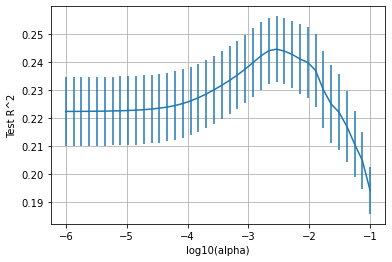

In [20]:
plt.errorbar(np.log10(alphas), rsq_lasso_mean, yerr=rsq_lasso_se)
plt.xlabel('log10(alpha)')
plt.ylabel('Test R^2')
plt.grid()
plt.show()

In [21]:
im = np.argmax(rsq_lasso_mean)
alpha_normal = alphas[im]
print('Alpha optimal (normal rule) = %12.4e' % alpha_normal)
print('Mean test R^2 (normal rule) = %7.3f' % rsq_lasso_mean[im])

Alpha optimal (normal rule) =   2.8943e-03
Mean test R^2 (normal rule) =   0.245


# Support Vector Regressor

In [22]:
regressor = SVR(kernel = 'rbf')
regressor.fit(Xtr1, ytr1.ravel())
yhat = regressor.predict(Xts1)

rsq_ts = r2_score(yts1, yhat)
print('Test R^2     = %12.4e' % rsq_ts)

Test R^2     =   2.6877e-01


# Neural Networks

In [23]:
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Activation

In [24]:
import tensorflow.keras.backend as K
K.clear_session()

In [25]:

nin = Xtr.shape[1]  # dimension of input data
nh = 256   # number of hidden units
nout = 1  
model = Sequential()
model.add(Dense(units=nh, input_shape=(nin,),kernel_initializer='normal',activation='relu', name='hidden'))
model.add(Dense(units=20,kernel_initializer='normal' ,activation='tanh'))
model.add(Dense(units=1,kernel_initializer='normal' ,name='output', activation ='linear'))


In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 256)               39424     
                                                                 
 dense (Dense)               (None, 20)                5140      
                                                                 
 output (Dense)              (None, 1)                 21        
                                                                 
Total params: 44,585
Trainable params: 44,585
Non-trainable params: 0
_________________________________________________________________


In [27]:
from tensorflow.keras import optimizers
import tensorflow.keras.callbacks

opt = optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=opt,
              loss='mean_squared_error'
             )

In [28]:
hist = model.fit(Xtr1, ytr1, epochs=10, batch_size=100, validation_data=(Xts1,yts1))

Epoch 1/10
703/703 [==============================] - 4s 3ms/step - loss: 0.7546 - val_loss: 0.3601
Epoch 2/10
703/703 [==============================] - 2s 3ms/step - loss: 0.6457 - val_loss: 0.3441
Epoch 3/10
703/703 [==============================] - 2s 3ms/step - loss: 0.5789 - val_loss: 0.2843
Epoch 4/10
703/703 [==============================] - 2s 3ms/step - loss: 0.5481 - val_loss: 0.3021
Epoch 5/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4869 - val_loss: 0.3241
Epoch 6/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4622 - val_loss: 0.2471
Epoch 7/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4336 - val_loss: 0.3292
Epoch 8/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4819 - val_loss: 0.2549
Epoch 9/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4334 - val_loss: 0.5485
Epoch 10/10
703/703 [==============================] - 2s 3ms/step - loss: 0.4423 - val_loss: 0.2592

Text(0, 0.5, 'loss')

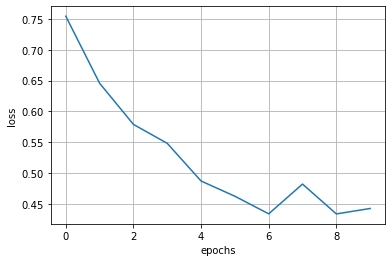

In [29]:
tr_accuracy = hist.history['loss']


plt.plot(tr_accuracy)
plt.grid()
plt.xlabel('epochs')
plt.ylabel('loss')


# Random Forest Regressor

In [34]:
model = RandomForestRegressor()
model.fit(Xtr1,ytr1.ravel())

# Get the mean absolute error on the validation data
yhat = model.predict(Xts1)
r2 = r2_score(yts1, yhat)
print('Random forest r2_score = ', r2)

Random forest r2_score =  0.9680379925364445


# XGboost

In [35]:
XGBModel = xg.XGBRegressor()
XGBModel.fit(Xtr1,ytr1 , verbose=False)

# Get the mean absolute error on the validation data :
yhat = XGBModel.predict(Xts1)
r2 = r2_score(yts1 , yhat)
print('XGBoost  r2_score = ',r2)

XGBoost  r2_score =  0.9704197614375748


# PCA

In [32]:
from sklearn.decomposition import PCA
import math

a = np.linspace(10,X.shape[1],10)

for i in a:
    
    pca = PCA(n_components=math.floor(i), svd_solver='randomized', whiten=True)
    pca.fit(Xtr)

    # Transform the training and test
    Ztr = pca.transform(Xtr)
    Zts = pca.transform(Xts)

    # Fit
    reg_ls = LinearRegression()
    reg_ls.fit(Ztr, ytr1)

    # Test R^2
    yhat1_ts = reg_ls.predict(Zts)
    rsq_ts = r2_score(yts1, yhat1_ts)
    print(f'i = {i}, Test R^2     = %12.4e' % rsq_ts)

i = 10.0, Test R^2     =   2.8203e-02
i = 25.88888888888889, Test R^2     =   1.1280e-01
i = 41.77777777777778, Test R^2     =   9.0084e-02
i = 57.66666666666667, Test R^2     =   8.9398e-02
i = 73.55555555555556, Test R^2     =   8.5535e-02
i = 89.44444444444444, Test R^2     =   7.8796e-02
i = 105.33333333333334, Test R^2     =   8.1828e-02
i = 121.22222222222223, Test R^2     =   1.3193e-01
i = 137.11111111111111, Test R^2     =   1.1866e-01
i = 153.0, Test R^2     =   1.3183e-01


# Ridge using PCA

In [33]:
reg_ls = Ridge(alpha=1e-5)
reg_ls.fit(Ztr, ytr1)
yhat1 = reg_ls.predict(Zts)
rsq = r2_score(yts1, yhat1)
print('Test R^2     = %f' % rsq)

Test R^2     = 0.132147
